In [1]:
# generate random Gaussian values
import random
from random import seed
from random import gauss
import math
import numpy as np
import pandas as pd
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# #log functions for each channel

# def channel_1_function(x, y_error_term = 0):
#   return (5 * math.log(x+0.001)) + y_error_term

# def channel_2_function(x, y_error_term = 0):
#   return (10 * math.log(x+0.001)) + y_error_term

# def channel_3_function(x, y_error_term = 0):
#   return (16 * math.log(x+0.001)) + y_error_term

In [3]:
#log functions for each channel

def channel_1_function(x, y_error_term = 0):
  return 1 - (1*np.exp(-1.7*x)) + y_error_term

def channel_2_function(x, y_error_term = 0):
  return 1 - (1*np.exp(-7.5*x)) + y_error_term

def channel_3_function(x, y_error_term = 0):
  return 1 - (1*np.exp(-3.4*x)) + y_error_term

In [4]:
def random_data_generator(channel_number):
  # seed random number generator
  seed(1)
  x_data = []
  y_data = []

  # generate some Gaussian values
  for value in range(50):
    
    if channel_number == 1:
      x = random.uniform(0, 1.5)
      y_error_term = gauss(0, 0.05)
      x_data.append(x)
      y_data.append(channel_1_function(x, y_error_term))

    elif channel_number == 2:
      x = random.uniform(0, 1.5)
      y_error_term = gauss(0, 0.02)
      x_data.append(x)
      y_data.append(channel_2_function(x, y_error_term))

    elif channel_number == 3:
      x = random.uniform(0, 1.5)
      y_error_term = gauss(0, 0.1)
      x_data.append(x)
      y_data.append(channel_3_function(x, y_error_term))

    df = pd.DataFrame({'spent': x_data, 'clicks': y_data}, columns=['spent', 'clicks'])

  return df

In [5]:
#generate dfs for each channel
df_channel_1 = random_data_generator(1)
df_channel_2 = random_data_generator(2)
df_channel_3 = random_data_generator(3)

#add channel column
df_channel_1["channel"] = "Bing"
df_channel_2["channel"] = "Facebook"
df_channel_3["channel"] = "Google"

df = pd.concat([df_channel_1, df_channel_2, df_channel_3], ignore_index=True)
df.head()

,spent,clicks,channel
0,0.201546,0.338910,Bing
1,0.382604,0.408662,Bing
2,0.743153,0.648315,Bing
3,1.183085,0.888836,Bing
4,0.140789,0.306389,Bing


In [6]:
df.groupby("channel")["spent"].agg("min")

channel
Bing        0.008564
Facebook    0.008564
Google      0.008564
Name: spent, dtype: float64

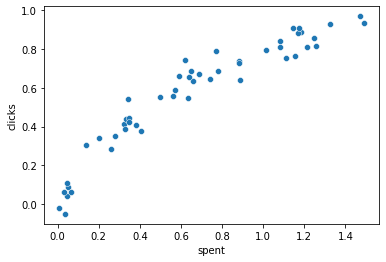

In [7]:
sns.scatterplot(x = "spent", y = "clicks", data = df[ (df["channel"] == "Bing") & (df["spent"] > 0) ])

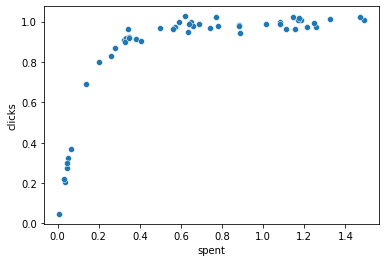

In [8]:
sns.scatterplot(x = "spent", y = "clicks", data = df[ (df["channel"] == "Facebook") & (df["spent"] > 0) ])

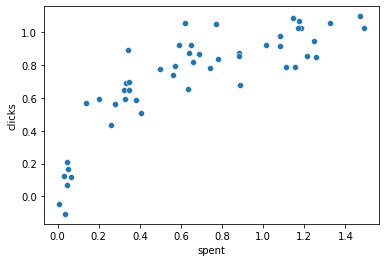

In [9]:
sns.scatterplot(x = "spent", y = "clicks", data = df[ (df["channel"] == "Google") & (df["spent"] > 0) ])

In [10]:
df.to_csv("synthetic_data.csv")